## Decision Trees

### Training and Visualizing a Decision Tree

In [28]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

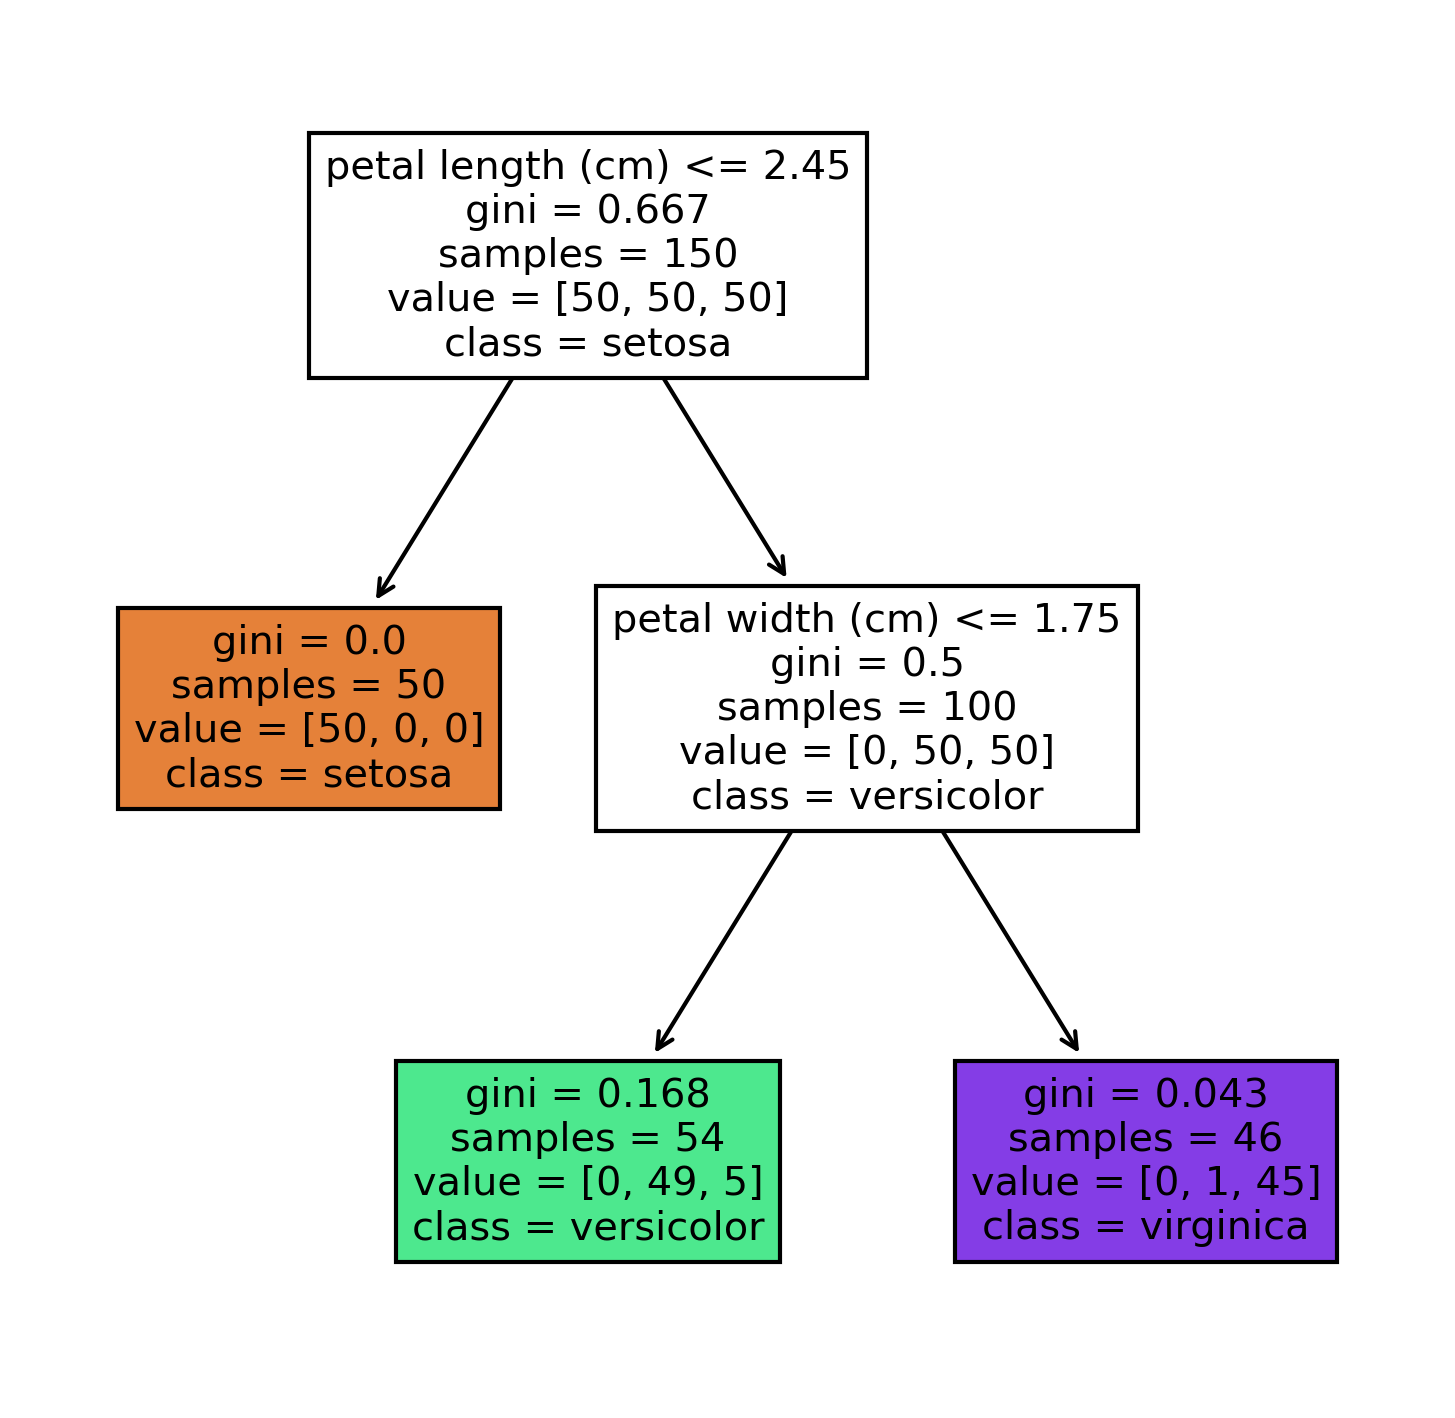

In [29]:
# We can use sklearn's tree visualizer to visualize the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def plot_tree_model(model):
    fn=['petal length (cm)','petal width (cm)']
    cn=['setosa', 'versicolor', 'virginica']
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
    plot_tree(model,
                feature_names = fn, 
                class_names=cn,
                filled = True);

plot_tree_model(tree_clf)

### Making Predictions

The way, a tree makes predictions is by following the path of the tree from the root to a leaf. The leaf node is the one that contains the prediction. It is fairly intuitive.

>One of the many qualities of Decision Trees is that they require
very little data preparation. In particular, they don’t require feature
scaling or centering at all.

* A node’s samples attribute counts how many training instances it applies to. For
example, 100 training instances have a petal length greater than 2.45 cm (depth 1,
right), among which 54 have a petal width smaller than 1.75 cm (depth 2, left).
* A node’s value attribute tells you how many training instances of each class this node
applies to: for example, the bottom-right node applies to 0 Iris-Setosa, 1 Iris-Versicolor, and 45 Iris-Virginica.
* A node’s gini attribute measures its impur‐
ity: a node is “pure” (gini=0) if all training instances it applies to belong to the same
class. For example, since the depth-1 left node applies only to Iris-Setosa training
instances, it is pure and its gini score is 0.

#### >Gini Impurity
>The gini impurity is defined as follows:
>$$ G_i = 1 - \sum_{k=1}^{n}{p_{i,k}}^2 $$
>where $p_{i,k}$ is the ratio of class k instances among the training instances in the $i^{th}$ node. <br>

For example, the depth-2 left node
has a gini score equal to $1 – (\frac{0}{54})^2 – (\frac{49}{54})^2 – (\frac{5}{54})^2 ≈ 0.168$

>Scikit-Learn uses the *CART* algorithm, which produces only binary
trees: nonleaf nodes always have two children (i.e., questions only
have yes/no answers). However, other algorithms such as *ID3* can
produce Decision Trees with nodes that have more than two children.

<figure>
<figcaption><h3>Decision Boundaries</h3></figcaption>
<img src = "img/06_01.png">
</figure>

>### White Box Versus Black Box
>As you can see Decision Trees are fairly intuitive and their decisions are easy to inter‐
pret. Such models are often called white box models. In contrast, as we will see, Ran‐
dom Forests or neural networks are generally considered black box models. They
make great predictions, and you can easily check the calculations that they performed
to make these predictions; nevertheless, it is usually hard to explain in simple terms
why the predictions were made.

### Estimating Class Probabilities


A Decision Tree can also estimate the probability that an instance belongs to a partic‐
ular class k: first it traverses the tree to find the leaf node for this instance, and then it
returns the ratio of training instances of class k in this node. For example, suppose
you have found a flower whose petals are 5 cm long and 1.5 cm wide. The corre‐
sponding leaf node is the depth-2 left node, so the Decision Tree should output the
following probabilities: 0% for Iris-Setosa (0/54), 90.7% for Iris-Versicolor (49/54),
and 9.3% for Iris-Virginica (5/54).

In [11]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [12]:
tree_clf.predict([[5, 1.5]])

array([1])

### The CART Training Algorithm

Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train
Decision Trees. The algorithm first splits the training set in two subsets using a single feature k and a thres‐
hold $t_k$ (e.g., “petal length ≤ 2.45 cm”). How does it choose k and $t_k$? It searches for the
pair $(k, t_k)$ that produces the purest subsets (weighted by their size). The cost function
that the algorithm tries to minimize is given by

<figure>
<figcaption><h3>CART cost function for classification</h3></figcaption>
<img src = "img/06_02.png">
</figure>

>The CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the
process at each level. It does not check whether or not the split will
lead to the lowest possible impurity several levels down. A greedy
algorithm often produces a reasonably good solution, but it is not
guaranteed to be the optimal solution.<br>
Unfortunately, finding the optimal tree is known to be an *NP Complete problem*: it requires $O(exp(m))$ time, making the problem intractable even for fairly small training sets. This is why we
must settle for a “reasonably good” solution.

### Computational Complexity

The overall prediction complexity is just $O(log_2(m))$, independent of the number of features. So predictions are very fast, even when dealing with large training sets.<br>
However, the training algorithm compares all features (or less if max_features is set)
on all samples at each node. This results in a training complexity of $O(n × m log(m))$.

### >Entropy
> In ML, entropy is calculated as follows:
>$$ H(x) = -\sum_{k=1}^{n}{p_{i,k}} \log_2{p_{i,k}} $$
>where $p_{i,k}$ is the ratio of class k instances among the training instances in the $i^{th}$ node.

For example: the depth-2 left node in the figure has an entropy equal to $-\frac{49}{54}\log_2{\frac{49}{54}}− \frac{5}{54}\log_2{\frac{5}{54}} ≈ 0.445$
>Generally, both entropy and gini impurity gives identical trees.

### Regularization Hyperparameters

Left unconstrained, the tree structure will adapt itself to the training data, fitting it very
closely, and most likely overfitting it. Such a model is often called a nonparametric
model, not because it does not have any parameters (it often has a lot) but because the
number of parameters is not determined prior to training, so the model structure is
free to stick closely to the data. In contrast, a parametric model such as a linear model
has a predetermined number of parameters, so its degree of freedom is limited,
reducing the risk of overfitting (but increasing the risk of underfitting).

To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom
during training. As you know by now, this is called regularization. The regularization
hyperparameters depend on the algorithm used, but generally you can at least restrict
the maximum depth of the Decision Tree. In Scikit-Learn, this is controlled by the
`max_depth` hyperparameter.

The `DecisionTreeClassifier` class has a few other parameters that similarly restrict
the shape of the Decision Tree: `min_samples_split` (the minimum number of sam‐
ples a node must have before it can be split), `min_samples_leaf` (the minimum num‐
ber of samples a leaf node must have), `min_weight_fraction_leaf` (same as
min_samples_leaf but expressed as a fraction of the total number of weighted instances), `max_leaf_nodes` (maximum number of leaf nodes), and `max_features`
(maximum number of features that are evaluated for splitting at each node). 
**Increasing min_ hyperparameters or reducing max_ hyperparameters will regularize the
model.**

<figure>
<figcaption><h3>Regularization using min_samples_leaf</h3></figcaption>
<img src = "img/06_03.png">
</figure>

## Regression

Decision Trees are also capable of performing regression tasks. 

In [23]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [24]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

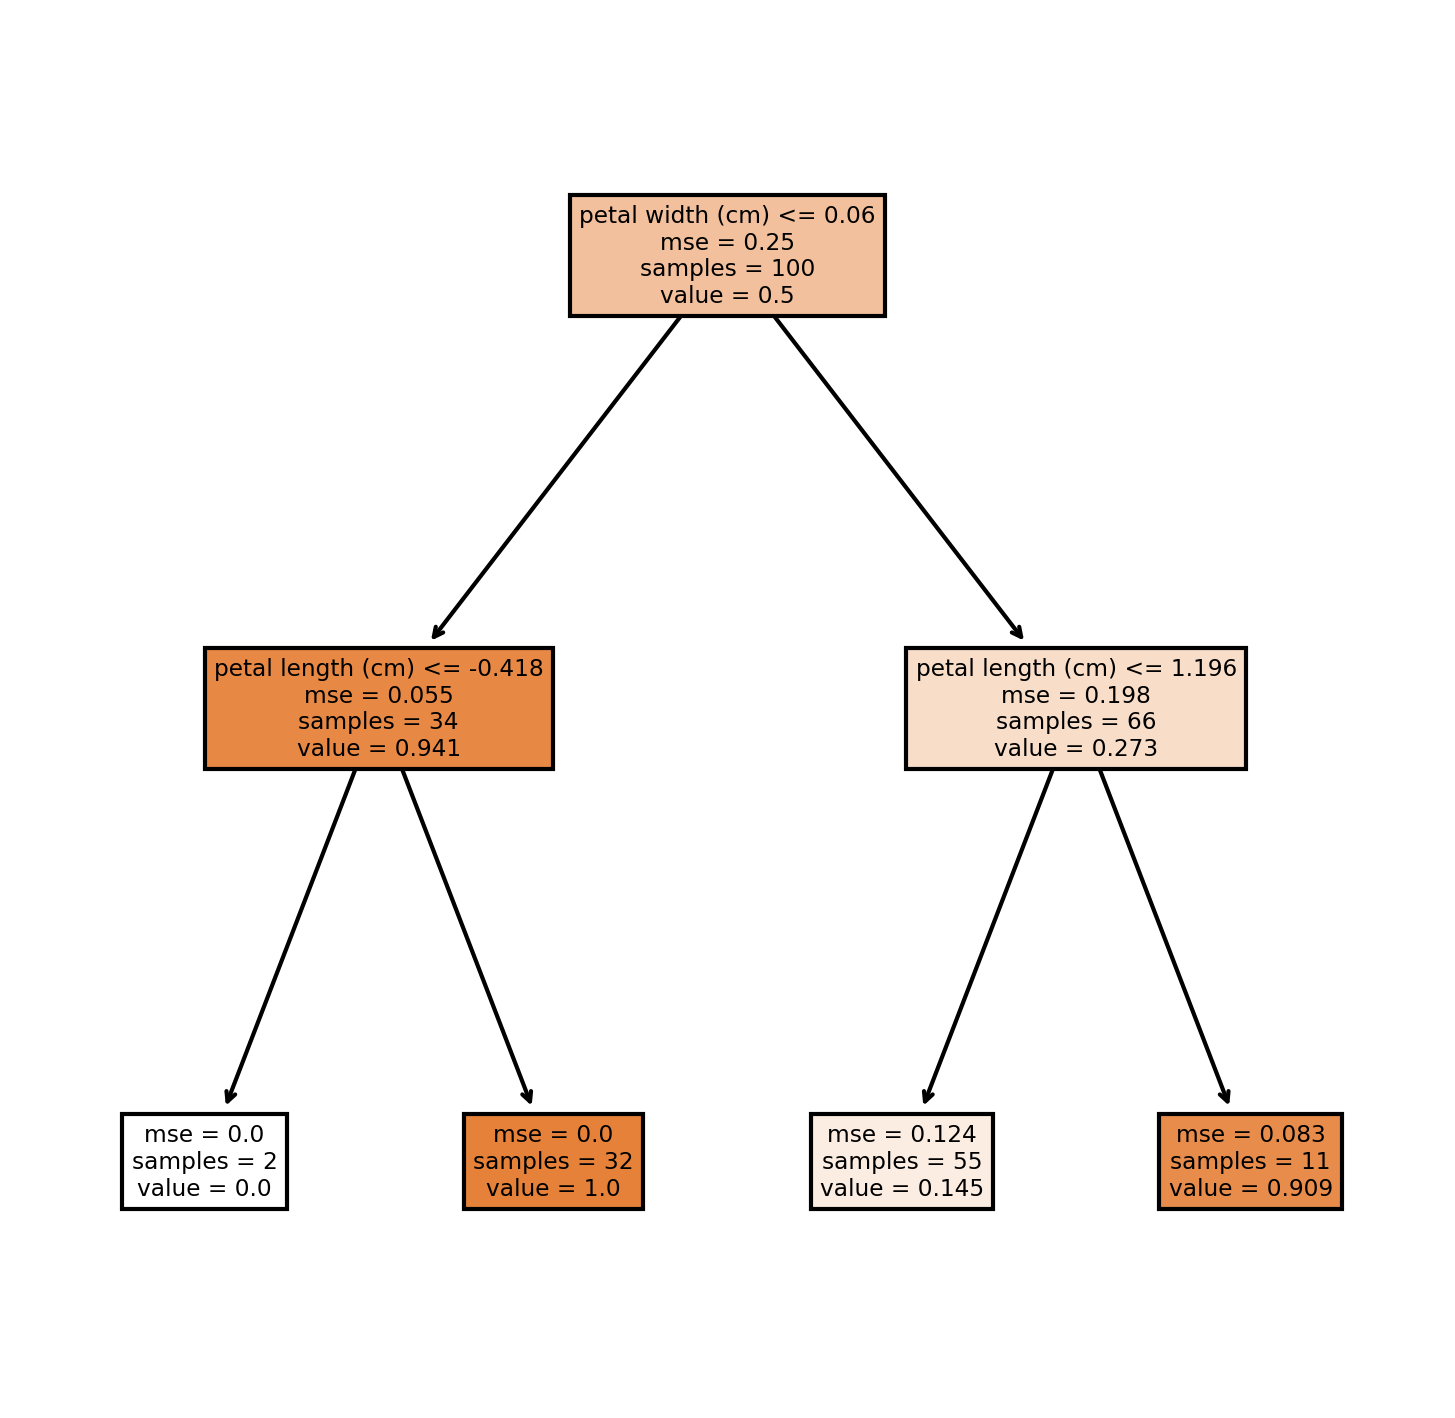

In [25]:
plot_tree_model(tree_reg)

The decision boundries for this dataset are shown in the figure below.

<figure>
<figcaption><h3>Predictions of two Decision Tree regression models</h3></figcaption>
<img src = "img/06_04.png">
</figure>

### Cost Function


The CART algorithm works mostly the same way as earlier, except that instead of try‐
ing to split the training set in a way that minimizes impurity, it now tries to split the
training set in a way that minimizes the MSE. 

<figure>
<figcaption><h3>CART cost function for regression</h3></figcaption>
<img src = "img/06_05.png">
</figure>

Just like for classification tasks, Decision Trees are prone to overfitting when dealing
with regression tasks. 

<figure>
<figcaption><h3>Regularizing a Decision Tree regressor</h3></figcaption>
<img src = "img/06_06.png">
</figure>

### Instability

In Decision all splits are perpendicular to an axis, 
which makes them sensitive to training set rotation. For example, the figure shows a
simple linearly separable dataset: on the left, a Decision Tree can split it easily, while
on the right, after the dataset is rotated by 45°, the decision boundary looks unneces‐
sarily convoluted. Although both Decision Trees fit the training set perfectly, it is very
likely that the model on the right will not generalize well. One way to limit this prob‐
lem is to use **PCA**, which often results in a better orientation of the
training data.

<figure>
<figcaption><h3> Sensitivity to training set rotation</h3></figcaption>
<img src = "img/06_07.png">
</figure>

>More generally, the main issue with Decision Trees is that they are very sensitive to
small variations in the training data.